# Implementing Linear Regression Algorithm with Numpy
  

## Introduction

Linear Regression is a method for modeling the relationship between one or more independent or features variables and one dependent or target variable.
There are two ways of looking at a Regression problem:
*	**The statistician’s paradigm:** The goal is to understand the underlying causal effect of changes in an independent variable on changes in a dependent variable. For example, you may want to model the impact of an additional year of schooling on latter's wages. Or maybe the effect of a \$ X discount on customers' propensity to adopt a product.

*	**The predictive paradigm:** Common in machine learning. Used for prediction and pattern recognition.


There are many useful resources explaining the concept behind regression so, I won't be going into much detail here. I will only cover the points necessary to understand the math and implement it yourself without the help of any machine learning library. A typical regression equation looks like this: 

$$ \Large y = \underbrace{\alpha + \beta_1 \times x_1 + \beta_2 \times x_2 + \cdots + \beta_n \times x_n}_{\text{$\widehat{y}$}} + \epsilon \tag{1.0}$$

Here , the right hand side variables ($x_1,x_2\cdots etc.$) are called the feature variables which along with their respective weights/coefficients ($\alpha,\beta_1,\beta_2\cdots etc.$) tries to predict the best fit model. When we know the value of these coefficients, we can make predictions about the data that we haven't seen before. In other words, we can infer the target value from feature values.
$y$ is the actual outcome variable you are trying to measure. $\widehat{y}$ is the predicted outcome.

> There is always some scope of error between the actual target value and the predicted value. The goal of Linear Regression is to find the coefficients in order to minimize this error $\epsilon$.

## Matrix-Vector Representation of Linear Regression equation

Before we dive into the math let's see if we can visualize the above equation (1.0) in a matrix-vector representation. The above equation represents one single record of data. Let's rewrite the equation in a little different way. The intercept $\alpha$ can be thought of as a coefficient of x where x=1.

$$ \begin{align}\large \widehat{y} = \alpha\times 1+ \beta_1 \times x_1 + \beta_2 \times x_2 + \cdots + \beta_n \times x_n \end{align} \tag{1.1}$$


\begin{equation}
\begin{bmatrix}
\widehat{y}
\end{bmatrix}_{1 \times 1}=
  \begin{bmatrix}
    1 & x_1 & x_2 & x_3 & ... & x_n 
  \end{bmatrix}_{1 \times n+1}
  %
  \begin{bmatrix}
    \alpha \\
    \beta_1 \\
    \beta_2 \\
    \beta_3 \\
     \vdots \\
    \beta_n \\
  \end{bmatrix}_{n+1 \times 1} \tag{1.2}
\end{equation}

Now, if we do a dot product of eq(1.2) we will get back eq(1.1).

In a typical regression problem, we will have multitude of data. If we have m records with n feature each , the matrix-vector representation of the equation will look like this.
\begin{equation}
\begin{bmatrix}
\widehat{y_1} \\
\widehat{y_2} \\
\widehat{y_3} \\
\vdots \\
\widehat{y_m} 
\end{bmatrix}_{ m \times 1}=
  \begin{bmatrix}
    1 & x_{11} & x_{12} & x_{13} & ... & x_{1n} \\
    1 & x_{21} & x_{22} & x_{23} & ... & x_{2n} \\
    1 & x_{31} & x_{32} & x_{33} & ... & x_{3n} \\
    \vdots \\
    1 & x_{m1} & x_{m2} & x_{m3} & ... & x_{mn} \\
  \end{bmatrix}_{ m \times n+1}
  %
  \begin{bmatrix}
    \alpha \\
    \beta_1 \\
    \beta_2 \\
    \beta_3 \\
     \vdots \\
    \beta_n \\
  \end{bmatrix}_{ n+1 \times 1} \tag{1.3}
\end{equation}

Why did I emphasize on such representation? Because rather than calculating each weight individually, you will have a vector representation of the weights and calculate them in one shot much more efficiently. These weights are called parameters in machine learning lingo. Notice that the weight vector doesn't change its dimension with more data, that means the number of parameters to calculate doesn't change with the number of records.

## Gradient Descent Algorithm

As I mentioned previously, the goal of regression problem is to calculate the weights such that the error between the predicted y and the actual y is minimum.

Even though Linear Regression has an analytical solution $\theta=(X^TX)^{-1}X^TY$ where $\theta$ is a vector representing all the coefficients we need for each feature, for large feature sets the computation can get very complex. Also, for huge dataset, the data may not fit in the memory.

The alternate solution to calculate parameters is based on maximum likelihood estimation. Maximum likelihood estimation is a method that determines values for the parameters of a model such that they maximize the likelihood that the process described by the model produced the data that were actually observed. 

Gradient descent is one such maximum likelihood estimation algorithm.

The main reason why gradient descent is used for linear regression is that it is computationally cheaper (faster) to find the solution using the gradient descent in some cases. It is beyond the scope of this post to fully explain how gradient descent works.

## Steps to estimate parameters

Here are the steps we need to go through to compute the parameters. Each step will be followed by the corresponding code snippets. The entire code can be found at the end.

### Step 1. Define your model and gather your data
This is a very important step where you identify your dependent and feature variables.
> Before you run the gradient descent algorithm on your dataset, you normalize the data. Normalization is a technique often applied as part of data preparation in machine learning pipeline which typically means rescaling the values into a range of [0,1] to boost the accuracy while lowering the cost (error). When features are all on the same scale, they will contribute equally to determining the direction for greatest gradient descent.  


For the purpose of this post, let's assume we have a dataset of 100 records and two features. We will not use any existing dataset, rather we will synthetically generate our own data and randomly split it in 80:20 ratio between train and test set. For the two features, we have to calculate two coefficients and an intercept. The equation will look like: $$ \begin{align}\large \widehat{y} = \alpha\times 1+ \beta_1 \times x_1 + \beta_2 \times x_2 \end{align} $$
The labels are generated taking $\alpha=2$ ,$\beta_1=0.1$,$\beta_2=0.4$ and some Gaussian noise.

In [3]:
# Data Generation
import numpy as np

np.random.seed(42)
X = np.random.rand(100, 2)
#Stack another vector of 1 horizontally
ones = np.ones(100).reshape(100,1)
X= np.hstack((ones,X))
y = 2 +  .1 * np.random.randn(100, 1) +.4 * np.random.randn(100, 1)

#Normalize the data 
mean = np.mean(X)
sigma = np.std(X)
X = (X-mean) / sigma

# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = X[train_idx], y[train_idx]
x_val, y_val = X[val_idx], y[val_idx]

Notice, we initially generated X with 2 columns (for two features) and 100 rows (number of records) Then, we concatenated 1 to all X values for the intercept. The data is also normalized with mean and std. deviation before splitting into train and test set. At this point *y is $100\times 1$ vector and X* is $100\times3$ matrix.


### Step 2. Initialize the Parameters
Once we have identified your feature variables, we have an idea how many parameters you need to train. Since we have two feature and one intercept there are three parameters to be trained. The dimension of weight vector is $3\times1$. Initialize the parameters to random values to begin with.

In [4]:
W = np.random.rand(X.shape[1],1)
W

array([[0.37673897],
       [0.7495783 ],
       [0.39298945]])

### Step 3. Define the loss/cost function that you want to minimize

Ideally, the loss is the difference between the predicted value and the actual value.
$$\large error = (y_i - \hat{y_i})$$

For the linear regression problem, the loss is given by the Mean Square Error (MSE), that is, the average of all squared differences between labels (y) and predictions ($\widehat{y}$).We take the square of the errors so that the positive and negative error doesn’t cancel out.N is the number of records, in our case N=100.

$$\large MSE  = \frac{1}{N}\sum_{n=1}^{N}(y - \widehat{y})^2$$



    

In [5]:
def compute_cost(y,y_hat):
    loss = np.mean((y-y_hat)**2)
    return loss

### Step 4.  Compute the Gradients
A gradient is a partial derivative that tells you how much a given quantity changes when you slightly vary some other quantity. In our case, how much does our MSE loss change when we vary each one of our parameters. We calculate the partial derivative of loss with respect to each parameter.

$$ MSE  = \frac{1}{N}\sum_{n=1}^{N}(y - \widehat{y})^2$$

$$\large MSE  = \frac{1}{N}\sum_{n=1}^{N}(y - (\alpha + \beta_1 * x_1 + \beta_2 * x_2))^2$$

$$ \large \frac{\partial MSE}{\partial \alpha} = \frac{1}{N}\sum_{n=1}^{N}(2).(y - (\alpha + \beta_1 * x_1 + \beta_2 * x_2)).(-1) = -\frac{2}{N}\sum_{n=1}^{N}(y - \widehat{y})) $$

$$ \large \frac{\partial MSE}{\partial \beta_1} = \frac{1}{N}\sum_{n=1}^{N}(2).(y - (\alpha + \beta_1 * x_1 + \beta_2 * x_2)).(-x_1) = -\frac{2}{N}\sum_{n=1}^{N}x_1(y - \widehat{y})) $$

$$ \large \frac{\partial MSE}{\partial \beta_2} = \frac{1}{N}\sum_{n=1}^{N}(2).(y - (\alpha + \beta_1 * x_1 + \beta_2 * x_2)).(-x_2) = -\frac{2}{N}\sum_{n=1}^{N}x_2(y - \widehat{y})) $$  

Here, we calculated the partial derivate individually by hand for each parameter. But in reality, we will calculate in one shot through  NumPy.

In [6]:
def partial_derivative(X,y,y_hat):
    n_samples=len(y)
    pd= np.dot(X.T,(y-y_hat))*(-2/n_samples)
    return pd

<img src="images/LR2.png" alt="Vector Representation of Partial Derivative"/>

As you see above the how easily you can calculate the partial derivative through NumPy.

### Step 5: Update the Parameters
In the final step, we use the gradients to update the parameters. Since we are trying to minimize our losses, we reverse the sign of the gradient for the update.
There is still another parameter to consider: the ***learning rate***, denoted by the Greek letter eta (that looks like the letter n), which is the multiplicative factor that we need to apply to the gradient for the parameter update. The learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

$$ \large \alpha = \alpha - \eta \frac{\partial MSE}{\partial \alpha} $$

$$ \large \beta_1 = \beta_1 - \eta \frac{\partial MSE}{\partial \beta_1} $$
$$ \large \beta_2 = \beta_2 - \eta \frac{\partial MSE}{\partial \beta_2} $$

> **Learning rate is a hyper-parameter that controls how much we are adjusting the weights of our model with respect to the loss gradient. The lower the value, the slower we travel along the downward slope.**

## The Complete Algorithm
Let's write down the entire algorithm 
* Initialize parameters with random values
> * LOOP till the stopping criteria is met:
    1. Compute the predicted y
    2. Compute loss
    3. Compute partial derivative w.r.t parameters
    4. Update parameters
    5. Repeat

In [7]:
 def fit(n_iter,lr):
    for i in range(n_iter):
        y_hat=np.dot(X,W)
        loss = compute_cost(y,y_hat)
        pd=partial_derivative(X,y,y_hat)
        W = W - lr*pd
        i=i+1

### Stopping criterion and update rule for Gradient Descent

There are a few options on deciding when to stop updating parameters.

*	Define a threshold and stop when the loss function for the training data is smaller than a threshold.
*	Define a threshold and stop when the loss function for the validation data is smaller than a threshold.
*	When the total absolute difference in parameters w is smaller than a threshold.
*	Sometimes, we don't care if we have the optimal parameters. We just want to improve the parameters we originally had. In such case, it's reasonable to preset a number of iterations over the training data and stop after that regardless of whether the objective function actually converged.


## Linear Regression in NumPy

Let's run the Linear Regression on our dataset. We will use 2000 iterations as our stopping criteria and use learning rate as 0.01.

In [8]:
#Class definition of Linear Regression
class LinearRegression:
    def __init__(self,X,y,lr=0.01,n_iter=2000):
        self.n_samples = len(y)
        self.W= np.random.rand(X.shape[1],1)
        self.X=X
        self.y=y
        self.lr=lr
        self.iter=n_iter
        self.history = np.zeros((n_iter,1))
   
    #Compute cost
    def compute_cost(self):
        loss = np.mean((self.y-self.y_hat)**2)
        return loss
    
    #Update the coefficients
    def update_param(self):
        self.W = self.W - self.lr*np.dot(self.X.T,(self.y-self.y_hat))*(-2/self.n_samples)
        
    def fit(self):
        for i in range(self.iter):
            self.y_hat=np.dot(self.X,self.W)
            loss = self.compute_cost()
            self.history[i]=loss
            self.update_param()
            i=i+1
        print("Updated params for numpy regression: ",self.W.reshape(3,))
     
    def predict(X_predict):        
        y_predict = np.dot(X_predict,self.W)
        return y_predict
    
    def getAllLoss(self):
        return self.history

In [9]:
lr = LinearRegression(x_train,y_train)
lr.fit()


Updated params for numpy regression:  [1.99931273 0.00640892 0.01194574]


Now, Lets plot the graph to see how the losses have been behaving with each iteration.

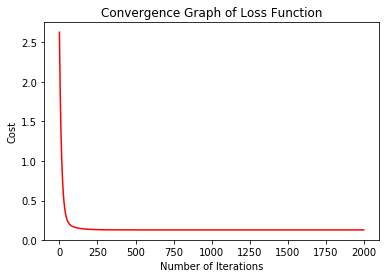

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

history= lr.getAllLoss()
plt.plot(range(len(history)), history, 'r')

plt.title("Convergence Graph of Loss Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

We can clearly see that the cost decreased drastically with more iterations. The gradient descent function returned the optimal parameter values, consequently, we can now use them to predict new target values.

## Comparing Our Implementation with Sklearn's Linear Regression

We will now run our training data on sklearn model and compare the results. One thing worth mentioning is since we had concatenated 1 in our model, sklearn will treat it as a coefficient and hence intercept is set to false.

In [12]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression(fit_intercept=False)
linr.fit(x_train, y_train)
print("updated params for sklearn regression: ",linr.coef_)

updated params for sklearn regression:  [[1.99931284 0.00640898 0.01194582]]


As you see the parameters calculated by our program match with sklearn's model up to 6 digits of decimal.